## Question 1


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
delays = [15, 30, 45, 20, 25, 100, 5, 60, 35, 50,
          120, 80, 10, 75, 90, 200, 55, 40, 70, 150]

Percentiles (10th, 25th, 50th, 75th, 90th): [ 14.5   28.75  52.5   82.5  123.  ]
IQR: 53.75
Outliers: [200]


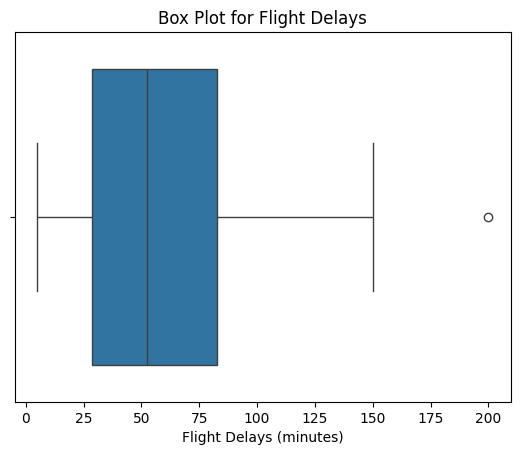

In [3]:
def flight_delay_analysis(delays):
    if not isinstance(delays, (list, np.ndarray)):
        print("Invalid data. Please provide a list or NumPy array.")
        return

    percentiles = np.percentile(delays, [10, 25, 50, 75, 90])
    Q1, Q3 = percentiles[1], percentiles[3]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in delays if x < lower_bound or x > upper_bound]

    print("Percentiles (10th, 25th, 50th, 75th, 90th):", percentiles)
    print("IQR:", IQR)
    print("Outliers:", outliers if outliers else "No outliers detected.")

    # Plot Boxplot
    sns.boxplot(x=delays)
    plt.xlabel('Flight Delays (minutes)')
    plt.title('Box Plot for Flight Delays')
    plt.show()

# Run the function
flight_delay_analysis(delays)

## Question 2

In [4]:
# Sample salary data
salaries = [30000, 32000, 35000, 37000, 40000, 42000, 45000, 47000, 50000, 55000,
            60000, 62000, 65000, 67000, 70000, 72000, 75000, 80000, 85000, 90000]

# Calculate Mean, Median, and Mode
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)
mode_salary = stats.mode(salaries, keepdims=True).mode[0]

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)

# Skewness Check
if mean_salary > median_salary:
    print("The data is Right Skewed (Positive Skew)")
elif mean_salary < median_salary:
    print("The data is Left Skewed (Negative Skew)")
else:
    print("The data is Symmetrical")


Mean Salary: 56950.0
Median Salary: 57500.0
Mode Salary: 30000
The data is Left Skewed (Negative Skew)


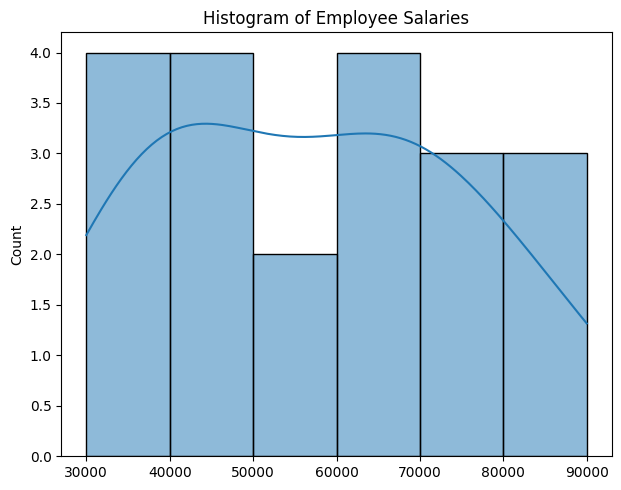

In [5]:
# Visualization using Histogram
plt.figure(figsize=(12,5))
# Histogram
plt.subplot(1,2,2)
sns.histplot(salaries, kde=True)
plt.title('Histogram of Employee Salaries')

plt.tight_layout()
plt.show()


## Question 3

In [6]:
# Sample data - Exam scores for 10 students
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Mathematics': [85, 78, 92, 88, 70, 95, 60, 80, 90, 76],
    'Science': [80, 85, 88, 70, 75, 92, 55, 82, 89, 78],
    'English': [78, 74, 85, 80, 68, 90, 50, 77, 83, 72]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Student,Mathematics,Science,English
0,A,85,80,78
1,B,78,85,74
2,C,92,88,85
3,D,88,70,80
4,E,70,75,68
5,F,95,92,90
6,G,60,55,50
7,H,80,82,77
8,I,90,89,83
9,J,76,78,72


Missing Values:
 Student        0
Mathematics    0
Science        0
English        0
dtype: int64

Descriptive Statistics:
        Mathematics    Science    English
count    10.000000  10.000000  10.000000
mean     81.400000  79.400000  75.700000
std      10.844353  10.895463  11.086027
min      60.000000  55.000000  50.000000
25%      76.500000  75.750000  72.500000
50%      82.500000  81.000000  77.500000
75%      89.500000  87.250000  82.250000
max      95.000000  92.000000  90.000000


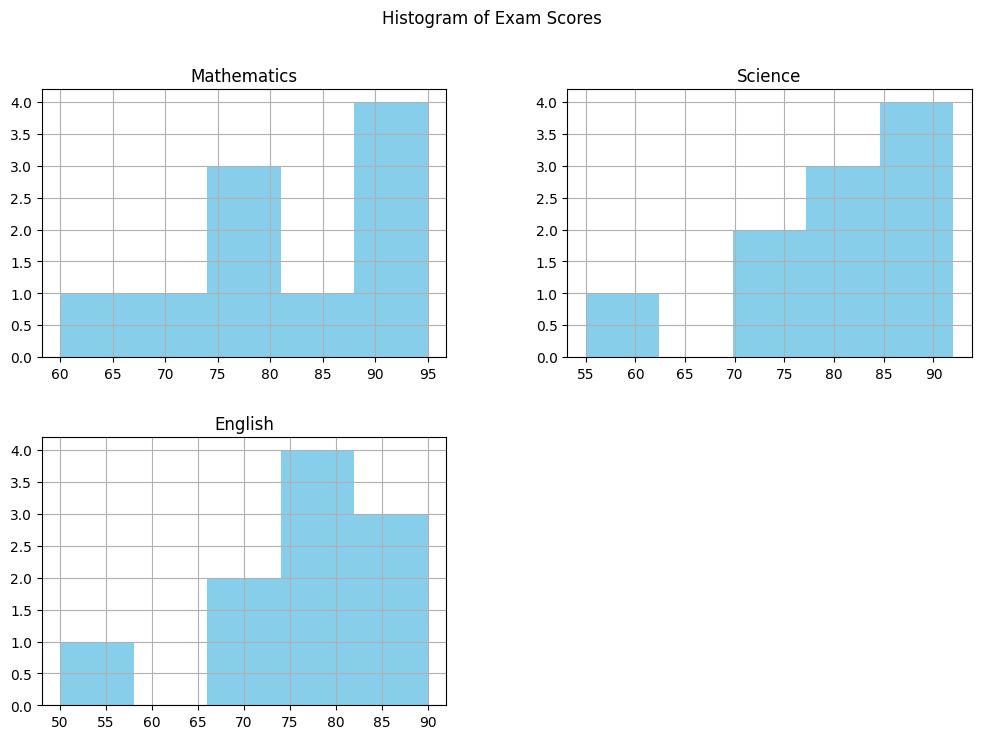


Correlation Matrix:
              Mathematics   Science   English
Mathematics     1.000000  0.792185  0.974318
Science         0.792185  1.000000  0.874999
English         0.974318  0.874999  1.000000


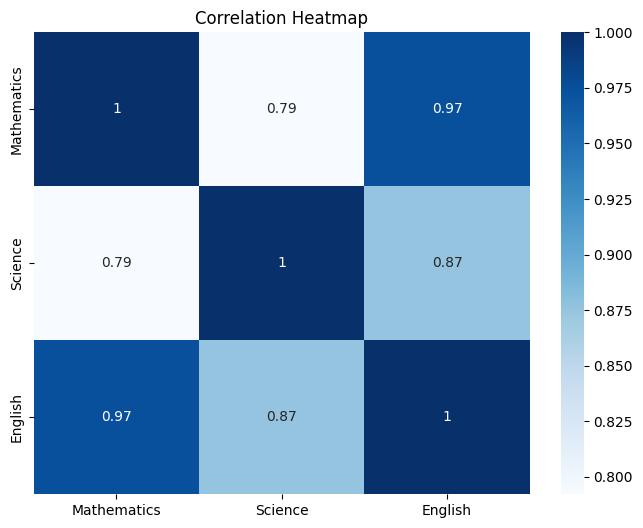

In [7]:

# Data Preprocessing (Check for missing values)
print("Missing Values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Visualization - Histogram
df[['Mathematics', 'Science', 'English']].hist(bins=5, figsize=(12,8), color='skyblue')
plt.suptitle('Histogram of Exam Scores')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Mathematics', 'Science', 'English']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


## Question 4

In [8]:
# Simulated blood sugar levels after treatment
medication_group = [110, 115, 108, 102, 107, 99, 111, 104, 109, 101]
placebo_group = [120, 125, 130, 122, 128, 119, 124, 127, 123, 126]

In [9]:

# Perform an independent T-test (assuming equal variance)
t_stat, p_value = stats.ttest_ind(medication_group, placebo_group)

# Output results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Evaluate hypothesis
if p_value <= 0.05:
    print("Reject the null hypothesis: The medication is effective.")
else:
    print("Fail to reject the null hypothesis: No significant effect of the medication.")


T-Statistic: -9.201427649220966
P-Value: 3.163912817600807e-08
Reject the null hypothesis: The medication is effective.


## Question 5

In [10]:
ratings = [8, 9, 7, 5, 6, 10, 9, 4, 7, 8,
           6, 9, 10, 5, 8, 7, 6, 9, 10, 7]


Mean Rating: 7.5
Median Rating: 7.5
Mode Rating: 7
Standard Deviation: 1.746424919657298


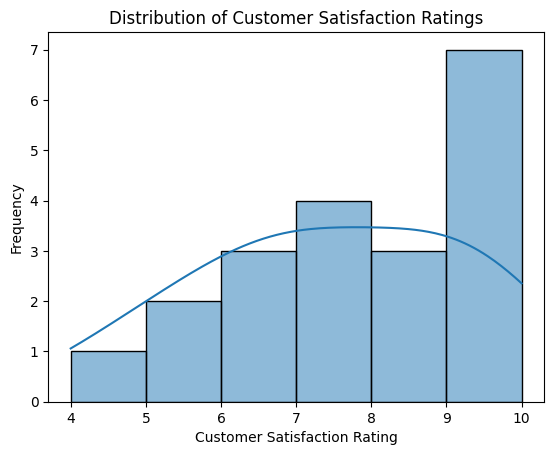

In [11]:
# Calculate descriptive statistics
mean_rating = np.mean(ratings)
median_rating = np.median(ratings)
mode_rating = stats.mode(ratings, keepdims=True).mode[0]
std_dev = np.std(ratings)

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")
print(f"Standard Deviation: {std_dev}")

# Visualizing the distribution using Histogram
sns.histplot(ratings, kde=True)
plt.xlabel('Customer Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Satisfaction Ratings')
plt.show()